In [1]:
import pandas as pd

# get data with reviews
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

# group by user_id and sort by most reviews
users = reviews.groupby('user_id').count().sort_values(by='text', ascending=False)

In [2]:
# select the 10,000 most active users
user_ids = users.reset_index()['user_id'].tolist()[:10000]

# select only the reviews from these users
reviews = reviews[reviews['user_id'].isin(user_ids)]

reviews.groupby('user_id').count()

,review_id,business_id,stars,useful,funny,cool,text,date
user_id,,,,,,,,
--_r6E98SNIrGU7weyNxbw,61,61,61,61,61,61,61,61
--u09WAjW741FdfkJXxNmg,95,95,95,95,95,95,95,95
-1MF2tosrw2WcCxeVNk81Q,76,76,76,76,76,76,76,76
-1WbN1Qd-opw8u3uEqs2Kg,82,82,82,82,82,82,82,82
-1awBy86Qgr3aN30_Z3xGw,66,66,66,66,66,66,66,66
...,...,...,...,...,...,...,...,...
zxyKewY6p0CjnFprEutaog,83,83,83,83,83,83,83,83
zy0el7c-IO4BvjxUgj-ZSw,88,88,88,88,88,88,88,88
zyNrXvJyYdC34tS6BcCykA,119,119,119,119,119,119,119,119


In [3]:
import pickle

embeddings = []

# read the 3 separate files with information regarding embeddings
for file in ['processed_data/all_restaurant_vectors_pt1',
             'processed_data/all_restaurant_vectors_pt2',
             'processed_data/all_restaurant_vectors_pt3']:

    # read file and obtain data for ids and restaurants
    with open(file, "rb") as pickle_file:
        restaurant_vectors = pickle.load(pickle_file)

        # add the data to our new lists with all information
        ids = restaurant_vectors[0]
        embeddings += restaurant_vectors[1]

# create dataframe from lists
restaurants = {'business_id': ids, 'embedding': embeddings}
restaurants = pd.DataFrame(data=restaurants)

# show results
restaurants

,business_id,embedding
0,---kPU91CF4Lq2-WlRu9Lw,"[0.0, 0.0012626262626262606, 0.0, 0.0, 0.00126..."
1,--0iUa4sNDFiZFrAdIWhZQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,--30_8IhuyMHbSOcNWd6DQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,--7PUidqRWpRSpXebiyxTg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,--7jw19RH9JKXgFohspgQw,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,"[0.0, 0.0018939393939393927, 0.0, 0.0, 0.0, 0...."
150342,zztOG2cKm87I6Iw_tleZsQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150343,zzu6_r3DxBJuXcjnOYVdTw,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150344,zzw66H6hVjXQEt0Js3Mo4A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
# import models
pca = pickle.load(open('models/price_score_pca.sav', 'rb'))
svm = pickle.load(open('models/price_score_model.sav', 'rb'))

# reduce the dimensions of the embeddings
pca_embedding = pca.transform(restaurants['embedding'].tolist())

# obtain the price score for every restaurant
price_score = svm.predict(pca_embedding)

# add price score to the dataframe
restaurants['price_score'] = price_score

# filter the data to reviews of restaurants with a price score
reviews = reviews[reviews['business_id'].isin(restaurants['business_id'].tolist())]

# transfer information from price score to reviews
price_information = dict(zip(restaurants['business_id'].tolist(), restaurants['price_score'].tolist()))
reviews['price_score'] = reviews['business_id'].apply(lambda x: price_information.get(x))

reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_score
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.263071
13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0.0,0.0,0.0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,2.497299
17,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4.0,1.0,0.0,0.0,The hubby and I have been here on multiple occ...,2014-08-10 19:41:43,2.750729
19,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0.0,0.0,0.0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,1.229286
24,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1.0,0.0,1.0,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,1.904357
...,...,...,...,...,...,...,...,...,...,...
6990276,YVX1Wsa4LYxjvFwuHBb_gA,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4.0,3.0,0.0,2.0,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03,2.093681
6990277,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2.549610
6990279,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2.534315
6990280,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2.042872


In [5]:
# save the dataframe of reviews with price score
reviews.to_csv('processed_data/reviews_price_score.csv', index=False)

In [6]:
from tqdm.notebook import tqdm

# create dictionaries to store the data
user_expectation = {}

# get the expectation coefficient for users and the mean price score
for user in tqdm(user_ids):
    user_reviews = reviews[reviews['user_id'] == user]
    user_expectation[user] = user_reviews[['price_score', 'stars']].corr().iloc[0, 1]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [7]:
# create new dataframe for user expectations
user_expectations = pd.DataFrame.from_dict(user_expectation, orient='index').reset_index()

# rename columns
user_expectations = user_expectations.rename(columns={"index": "user_id", 0: "correlation"})

# create a column for expectation coefficient
user_expectations['expectation'] = 0.5 * (1 - user_expectations['correlation'])

# check new dataframe
user_expectations

,user_id,correlation,expectation
0,_BcWyKQL16ndpBdggh2kNA,0.216456,0.391772
1,Xw7ZjaGfr0WNVt6s_5KZfA,0.198974,0.400513
2,0Igx-a1wAstiBDerGxXk2A,0.190772,0.404614
3,-G7Zkl1wIWBBmD0KRy_sCw,0.219971,0.390015
4,ET8n-r7glWYqZhuR6GcdNw,0.190922,0.404539
...,...,...,...
9995,yeGoG0ahKNeAXAvKEwnVOA,-0.199931,0.599966
9996,9FOrsYpBwOIHvTzqBpe0Qw,0.012120,0.493940
9997,o9Xqq_7wpRnckPUMG_C_cQ,0.289868,0.355066
9998,Ll5l4WTKPH7zWQWA68Rhdw,0.146630,0.426685


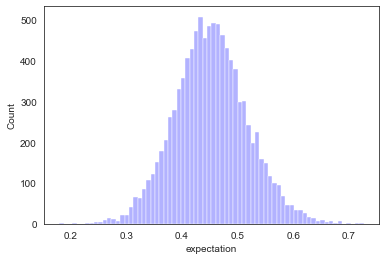

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

# check distribution of expectation values
sns.histplot(data=user_expectations, x='expectation', color=[0.6, 0.6, 1.0], fill=True)
plt.savefig('figures/expectations_distribution.png', dpi=200)
plt.show()

In [9]:
# import data for users
users = pd.read_csv('csv_data/yelp_academic_dataset_user.csv')

# filter only the users we are interested on
users = users[users['user_id'].isin(user_ids)]

# merge dataframes
users_with_expectations = users.merge(user_expectations, on='user_id')

# check new dataframe
users_with_expectations

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,correlation,expectation
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,157,251,1847,7054,3131,3131,1521,1946,0.112531,0.443735
1,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,395,130,915,3396,1915,1915,696,470,0.147306,0.426347
2,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,47,21,518,773,867,867,310,231,0.230683,0.384659
3,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,2,0,16,23,43,43,20,25,0.085328,0.457336
4,AkBtT43dYcttxQ3qOzPBAg,Sherri,1034,2007-02-20 18:21:07,3066,1485,2235,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016","Hg1EF9PjGfcKBSNMjvWBeQ, PcPminF0bIUsKjUh9e4DMQ...",114,...,83,23,229,570,528,528,118,50,0.207845,0.396078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,JX7mjMODvt96vQIj9ENzhw,R,221,2012-02-06 02:05:17,536,195,226,"2016,2017,2018,2019,20,20,2021","QiciohgD8N6vCty4vGL3pQ, _aDK_NGbMmfGGE6sgDBqnA...",22,...,0,0,35,49,27,27,7,16,-0.018222,0.509111
9996,mbvw-TCrr1GB0KKnhRm8Bw,Laura,141,2013-11-20 17:10:01,410,19,210,"2019,20,20,2021","4IsGHKofyfefMEM6X-zP3A, US7juhqY2QYZ_SLW_53gqA...",11,...,0,0,7,11,17,17,4,6,0.129754,0.435123
9997,KuApdo6_qx3K_wMqVDK3eA,Michelle,149,2018-08-21 14:32:38,129,12,52,"2019,20,20,2021","G0Ex17NeMJUwqNIl8Z4ecw, IB2Zyn6ak7wt4YN-jBwP4w...",5,...,0,0,7,7,6,6,12,9,0.148417,0.425791
9998,PVvxH6RF34ky9gvBrL6Zgg,Richard,85,2014-10-17 00:17:59,42,7,10,NaN,qT1-N9hjbyjMW4Mvq4uU4w,2,...,0,0,2,0,0,0,1,0,0.439042,0.280479


In [10]:
users_with_expectations.to_csv('processed_data/user_expectations.csv', index=False)